# Mean Value Baseline

As a baseline for the facial keypoints RMSE, we

1. Take only the images that have all 30 labels
2. Calculate the average value of each label using 80% of the images from 1.
3. Compare the average values from 2. with the true values of the labels in the remaining 20% of the images from 1.

The RMSE from the comparison in 3. is *3.1379662*. This is better than we thought it would be given the 0 to 96 range of the labels. Though when looking at the worst cases, it is clear the baseline is not a great fit.

The kaggle reported "Averages Benchmark" is 3.96242. This higher number probably reflects the fact that there are more different images in the holdout set for the leaderboar, whereas the images that contain all their lablels likely were coded similarly and are the most clean.

The code for this baseline calculation is below.


### Imports

In [45]:
%matplotlib inline
from pandas.io.parsers import read_csv
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### Constants

In [29]:
TRAIN_DATA = '../data/training.csv'
TEST_DATA = '../data/test.csv'
IMAGE_ROWS = 96
IMAGE_COLS = 96
INPUT_SHAPE = (IMAGE_ROWS, IMAGE_COLS, 1)

### Load the Data

In [30]:
def loader(test=False, seed=None, keeplabels=None):
    """Load the data without transforming any values"""
    if seed:
        np.random.seed(seed)
    fileloc = TEST_DATA if test else TRAIN_DATA
    
    df = read_csv(fileloc)
    
    df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, sep=' '))
    
    if keeplabels:
        df = df[list(keeplabels) + ['Image']]
        
    df = df.dropna() # drop rows with missing labels
    
    X = np.vstack(df['Image'])
    X = X.astype(np.float32)
    
    if not test:
        y = df[df.columns.difference(['Image'])].values
        y = y.astype(np.float32)
        shuffle = np.random.permutation(np.arange(X.shape[0]))
        X, y = X[shuffle], y[shuffle]
    else:
        y = None
    
    X = X.reshape(-1, 96, 96, 1)
    

    return X, y


In [31]:
X, y = loader(seed=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42)

### Create Mean Predictions

In [32]:
y_pred = np.tile(np.mean(y_train, axis=0),(y_test.shape[0], 1))

### Evaluate the predictions

RMSE = 3.13797
max error = 23.9953


D:\Anaconda2\envs\tf\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Residual')

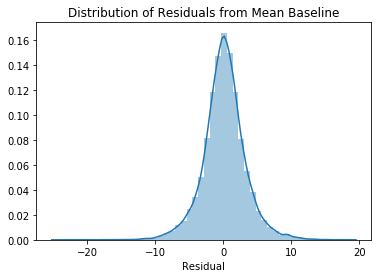

In [50]:
print( 'RMSE = ' + str(np.sqrt(mean_squared_error(y_pred, y_test))))
print( 'max error = ' + str(np.max(np.abs(y_test-y_pred))))
sns.distplot(y_test.flatten()-y_pred.flatten())
plt.title('Distribution of Residuals from Mean Baseline')
plt.xlabel('Residual')

This RMSE is not as bad as was expected. RMSE is the square root of the variance of the residuals. Thus, it can be interpreted as the standard deviation of the unexplained variance in the labels. Considering there are 96 total pixels in each direction, an RMSE of 3 does not seem super high. However, this baseline does have issues. The maximum error is nearly 24 pixels. 

### Image Comparison Plots

In [39]:
def plot_compare_images(image, points_act, points_pred ):
    """Helper function to plot and compare images"""
    plt.figure(figsize=(8,8))
       
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title("Actual")
    plt.imshow(np.reshape(image,(96,96)), cmap = 'gray')
    for x, y in np.reshape(points_act,(len(points_act)//2, 2)):
        plt.plot(x, y, 'rx')
        
    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.title("Predicted")
    plt.imshow(np.reshape(image,(96,96)), cmap = 'gray')
    for x, y in np.reshape(points_pred,(len(points_pred)//2, 2)):
        plt.plot(x, y, 'r*')  
   
    plt.show()

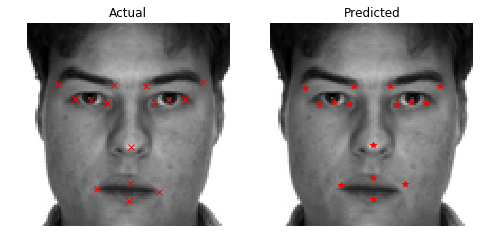

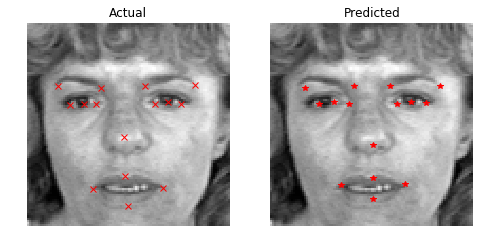

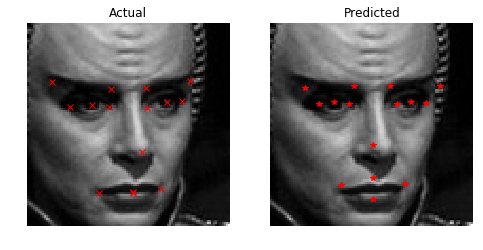

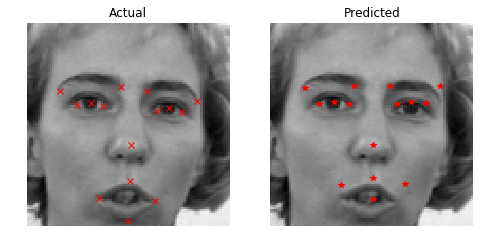

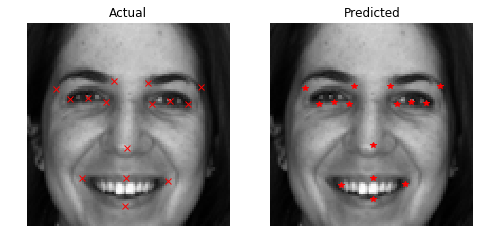

In [40]:
# comparison of a few predictions:

ex_start = 0 # starting index of set of images to compare
ex_end = 5  # stopping index

for i in range(ex_start, ex_end):
    plot_compare_images(X_test[i], y_test[i,:], y_pred[i,:] )